#MNIST
Our objective is to build a neural network for the classification of the MNIST dataset. This neural network will comprise two layers, each with 10 nodes, and an input layer with 784 nodes corresponding to the image pixels. The specific structure of the neural network is outlined below, where $X$ represents the input, $A^{[0]}$ denotes the first layer, $Z^{[1]}$ signifies the unactivated layer 1, $A^{[1]}$ stands for the activated layer 1, and so forth. The weights and biases are represented by $W$ and $b$ respectively:


<div align="center">

$A^{[0]}=X$

$Z^{[1]}=W^{[1]}A^{[0]}+b^{[1]}$

$A^{[1]}=\text{ReLU}(Z^{[1]})$

$Z^{[2]}=W^{[2]}A^{[1]}+b^{[2]}$

$A^{[2]}=\text{softmax}(Z^{[2]})$
</div>




You have the flexibility to create any function within or outside the class, allowing you to modify parameters as needed

In [15]:
#importing libraries
import pandas as pd
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
import random

### Required functions

In [16]:
# activation and loss functions
def ReLU(Z):
    return np.maximum(Z, 0)

def derivative_ReLU(x):
    b = np.array(x>0,dtype = np.float32)
    return b

def softmax(Z):
    A=np.exp(Z)/np.sum(np.exp(Z),axis=0,keepdims=True)
    return A



In [17]:
#complete the class of neural network

class NN:
    def __init__(self):
        self.W1 = np.random.randn(10, 784)*0.01
        self.W2 = np.random.randn(10, 10)*0.01
        self.b1 = np.random.rand(10, 1)
        self.b2 = np.random.rand(10, 1)



    def forward_prop(self, X):
        self.Z1 = self.W1.dot(X.T) + self.b1
        self.A1 = ReLU(self.Z1)
        self.Z2 = self.W2.dot(self.A1) + self.b2
        self.A2 = softmax(self.Z2)

        return self.A2

    def one_hot(self, labels, num_classes):
        num_samples = len(labels)
        one_hot_labels = np.zeros((num_classes, num_samples))

        for i in range(num_samples):
            one_hot_labels[labels[i], i] = 1

        return one_hot_labels

    def backward_prop(self, X, Y):
        m = X.shape[1]
        self.dZ2 = self.A2 - Y
        self.dW2 = (1 / m) * self.dZ2.dot(self.A1.T)
        self.db2 = (1 / m) * np.sum(self.dZ2,axis=1,keepdims=True)
        self.dZ1 = (1/m)*self.W2.T.dot(self.dZ2) * (derivative_ReLU(self.A1))
        self.dW1 = (1 / m) * self.dZ1.dot(X)
        self.db1 = (1 / m) * np.sum(self.dZ1,axis=1,keepdims= True)


    def update_params(self, alpha):
        self.W1 -= alpha * self.dW1
        self.b1 -= alpha * self.db1
        self.W2 -= alpha * self.dW2
        self.b2 -= alpha * self.db2

    def get_predictions(self):
        pass

    def cost_function(self,a,y):
        m = (y.T).shape[0]
        cost = -(1/m) * np.sum(y * np.log(a))
        return cost

    def get_accuracy(self, Y):
        predictions= np.argmax(self.A2,0)
        y=np.argmax(Y,0)
        return np.mean(predictions == y)*100

    def gradient_descent(self, X, Y, alpha, iterations):
        for i in range(iterations):
            a2 = self.forward_prop(X)
            self.backward_prop(X, Y)
            self.update_params(alpha)
            cost = self.cost_function(a2, Y)
            if i % (iterations / 10) == 0:
                print(f"Iteration {i}, Cost: {cost}")
        return self.W1, self.b1, self.W2, self.b2

    def make_predictions(self,X):
        A2 = self.forward_prop(X)
        predictions = np.argmax(A2)
        return predictions

    def show_prediction(self,x):
        idx = random.randrange(0, x.shape[0])
        single_image = x[idx,: ].reshape((28, 28))
        plt.imshow(single_image, cmap='gray')
        plt.show()

        input_image = x[idx, :].reshape(x[idx, :].shape[0], 1)
        prediction = self.make_predictions(input_image.T)

        print("Model predicts:", prediction)





## main

In [18]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


###preprocessing the data


In [19]:
# all values of pixels should be in range[0,1]
X_train = (X_train.reshape(X_train.shape[0], -1)/ 255.0)
X_test = (X_test.reshape(X_test.shape[0], -1) / 255.0)

In [20]:
nn=NN()
y_train_1 = nn.one_hot(y_train,10)
y_test_1 = nn.one_hot(y_test,10)

###Model Training

In [21]:
#training model using gradient descent
w1,b1,w2,b2= nn.gradient_descent(X_train, y_train_1,0.01,1000)



Iteration 0, Cost: 2.334218317752366
Iteration 100, Cost: 2.1586067524306665
Iteration 200, Cost: 1.5958982735686704
Iteration 300, Cost: 1.112162813121416
Iteration 400, Cost: 0.856951218168925
Iteration 500, Cost: 0.708953994137869
Iteration 600, Cost: 0.6181938095736101
Iteration 700, Cost: 0.5586248794451728
Iteration 800, Cost: 0.5161135811839476
Iteration 900, Cost: 0.48390698200986265


In [23]:
y_pred = nn.make_predictions(X_test)

accuracy = nn.get_accuracy(y_test_1)
print(accuracy)

87.15


### Viewing Results


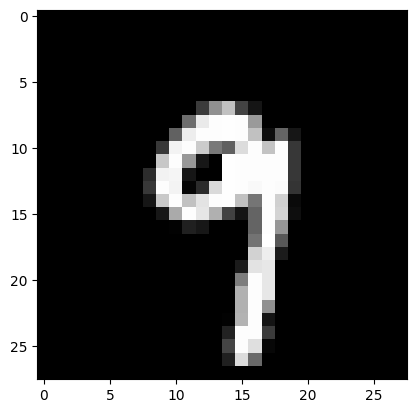

Model predicts: 9


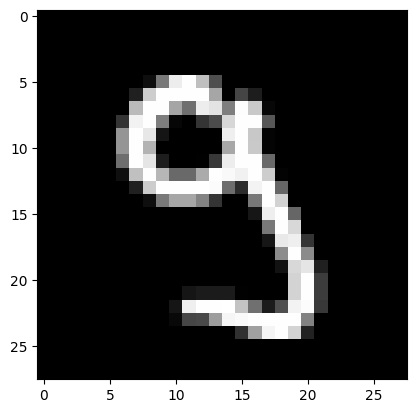

Model predicts: 3


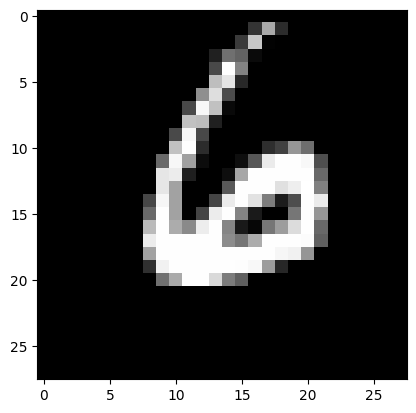

Model predicts: 6


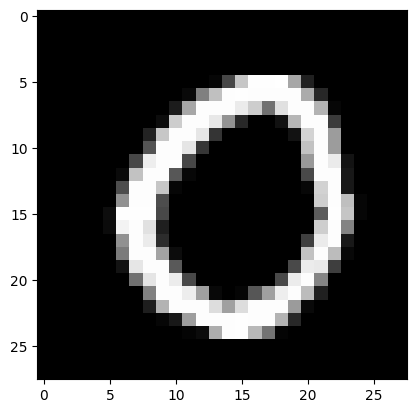

Model predicts: 0


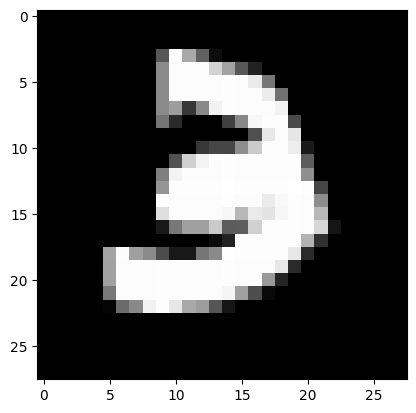

Model predicts: 2


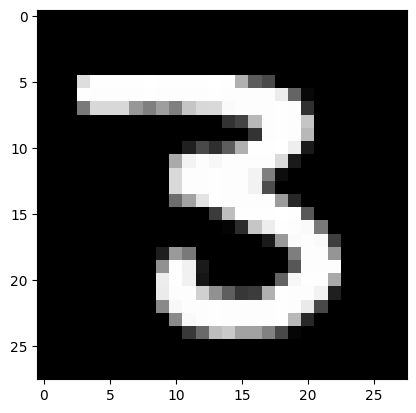

Model predicts: 3


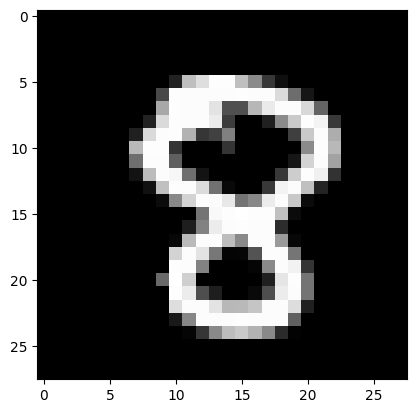

Model predicts: 8


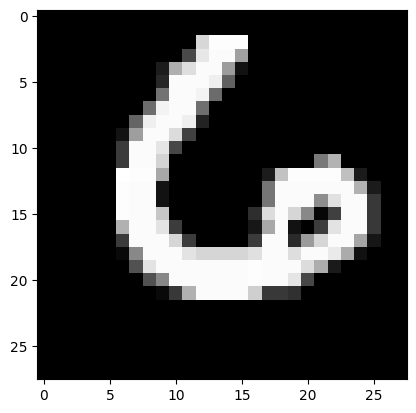

Model predicts: 6


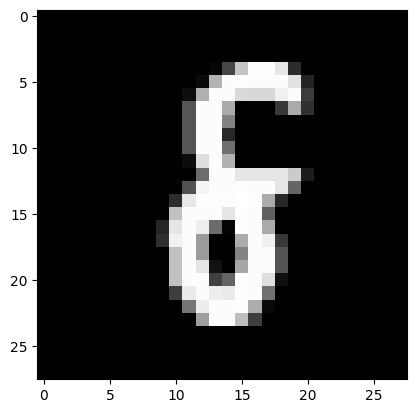

Model predicts: 8


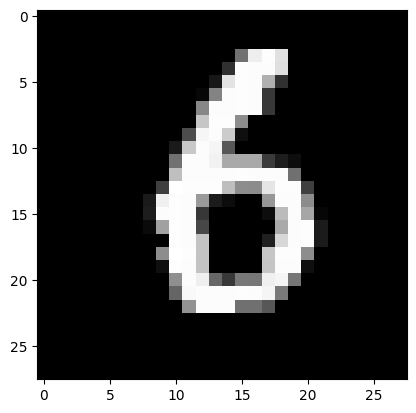

Model predicts: 6


In [24]:
#viewing prediction for 10 random images in dataset
for epoch in range(10) :
  nn.show_prediction(X_train)